В таблице 1338 строк, с помощью метода describe() получена информация о средних значениях, стандартном отклонении, минимальных и максимальных значениях, а так же о квартилях в числовых столбцах.

In [3]:
import pandas as pd
data = pd.read_csv('insurance.csv', sep = ',')
df = pd.DataFrame(data)
print(df)
print(df.describe())
print(df.info())
print(df.select_dtypes(include=['int64', 'float64']))

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.4

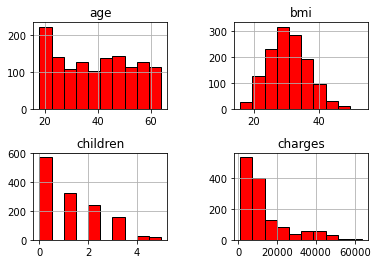

In [2]:
import matplotlib
import matplotlib.pyplot as plt
df.hist(color='red', edgecolor='black')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

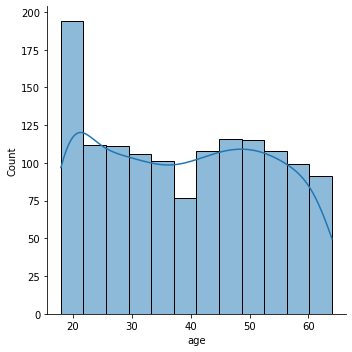

In [5]:
import seaborn as sns
sns.displot(df['age'], kde = True)

Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики.

Среднее bmi:  30.663397
Медиана bmi:  30.400000
Мода bmi:  ModeResult(mode=array([32.3]), count=array([13]))
Среднее charges:  13270.422265
Медиана charges:  9382.033000
Мода charges:  ModeResult(mode=array([1639.5631]), count=array([2]))
Размах bmi : 37.17
Стандартное отклонение bmi:  6.098186911679017
Межквартильный размах bmi:  8.384999999999998
Размах charges : 62648.554110000005
Стандартное отклонение charges:  12110.011236693994
Межквартильный размах charges:  11879.80148


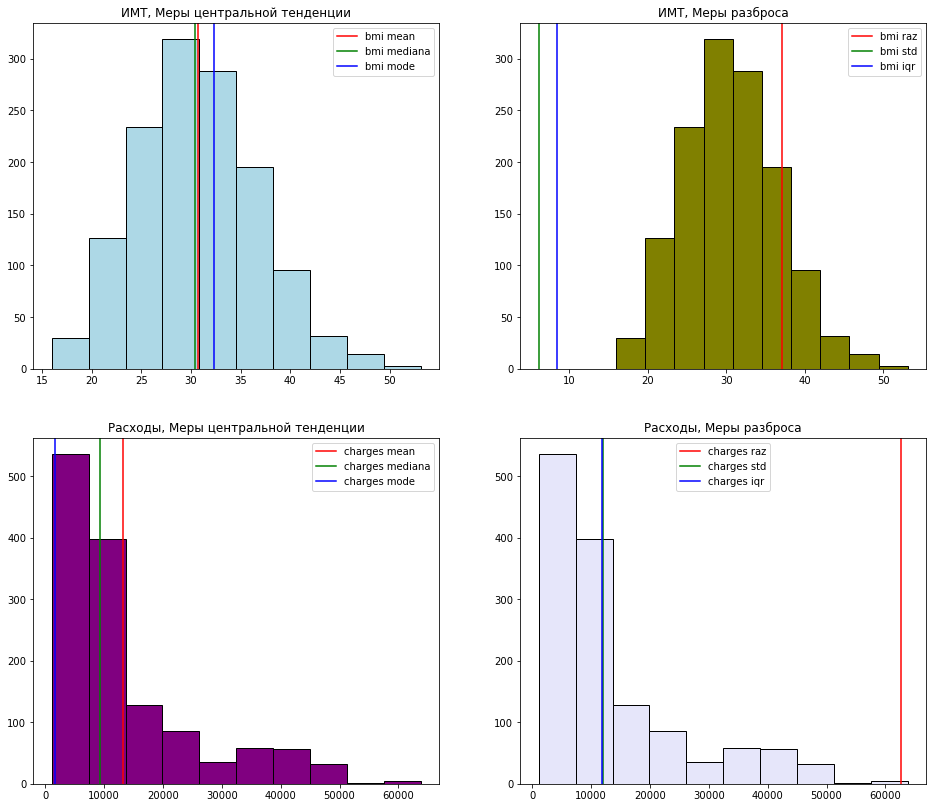

In [3]:
import numpy as np
import scipy.stats as sts

moda = sts.mode(df.bmi)
mean = np.mean(df.bmi)
med = np.median(df.bmi) 
print ("Меры центральной тенденции /n")
print("Среднее bmi: ", '{:.6f}'.format(mean))

print("Медиана bmi: ", '{:.6f}'.format(med))
print("Мода bmi: ", moda)

moda2 = sts.mode(df.charges)
mean2 = np.mean(df.charges)
med2 = np.median(df.charges)
print("Среднее charges: ", '{:.6f}'.format(mean2))
print("Медиана charges: ", '{:.6f}'.format(med2))
print("Мода charges: ", moda2)

raz = df.bmi.max() - df.bmi.min()
std = df.bmi.std()
iqr = sts.iqr(df.bmi, interpolation = 'midpoint')
print ("Меры разброса /n")
print ("Размах bmi :", raz)
print ("Стандартное отклонение bmi: ", std)
print("Межквартильный размах bmi: ", iqr)

raz2 = df.charges.max() - df.charges.min()
std2 = df.charges.std()
iqr2 = sts.iqr(df.charges, interpolation = 'midpoint')
print ("Размах charges :", raz2)
print ("Стандартное отклонение charges: ", std2)
print("Межквартильный размах charges: ", iqr2)

fig, ax = plt.subplots(2,2, figsize = (15,10))


ax[0][0].hist(df.bmi, edgecolor = 'black', facecolor = 'LightBlue')
ax[0][0].title.set_text("ИМТ, Меры центральной тенденции")
ax[0][0].axvline(mean, color='r', label = 'bmi mean')
ax[0][0].axvline(med, color='g', label = 'bmi mediana')
ax[0][0].axvline(moda.mode[0], color='b', label = 'bmi mode')
ax[0][0].legend()

ax[0][1].hist(df.bmi, edgecolor = 'black', facecolor = 'olive')
ax[0][1].title.set_text("ИМТ, Меры разброса")
ax[0][1].axvline(raz, color='r', label = 'bmi raz')
ax[0][1].axvline(std, color='g', label = 'bmi std')
ax[0][1].axvline(iqr, color='b', label = 'bmi iqr')
ax[0][1].legend()

ax[1][0].hist(df.charges, edgecolor = 'black', facecolor = 'purple')
ax[1][0].title.set_text("Расходы, Меры центральной тенденции")
ax[1][0].axvline(mean2, color='r', label = 'charges mean')
ax[1][0].axvline(med2, color='g', label = 'charges mediana')
ax[1][0].axvline(moda2.mode[0], color='b', label = 'charges mode')
ax[1][0].legend()

fig.set_figwidth(16)
fig.set_figheight(14)
ax[1][1].hist(df.charges, edgecolor = 'black', facecolor = 'lavender', bins = 10)
ax[1][1].title.set_text("Расходы, Меры разброса")
ax[1][1].axvline(raz2, color='r', label = 'charges raz')
ax[1][1].axvline(std2, color='g', label = 'charges std')
ax[1][1].axvline(iqr2, color='b', label = 'charges iqr')
ax[1][1].legend()

plt.show()

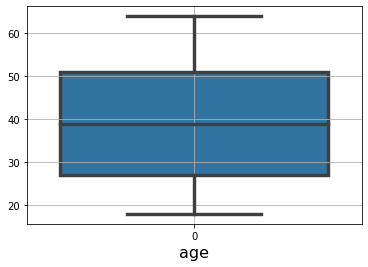

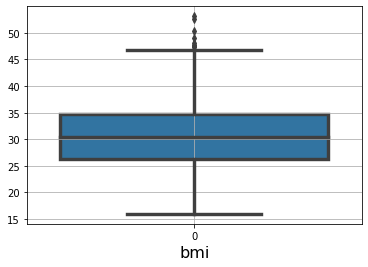

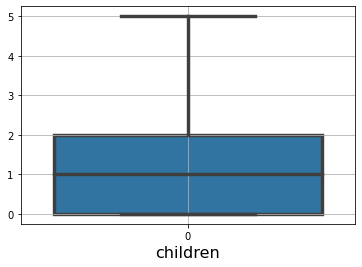

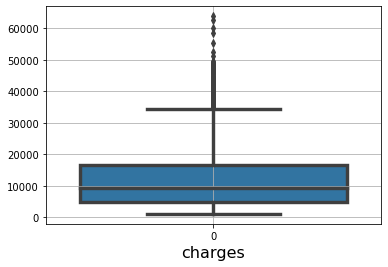

In [4]:
import seaborn as sns
df5 = df.select_dtypes(include=['int64', 'float64'])
for column in df5.columns:
    f= plt.figure()
    f.set_figwidth(6)
    f.set_figheight(4)
    sns.boxplot(data = df5[column], linewidth = 3.4)
    plt.xlabel(column, fontsize = 16)
    plt.grid()
    plt.show()

Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5.429908818434901


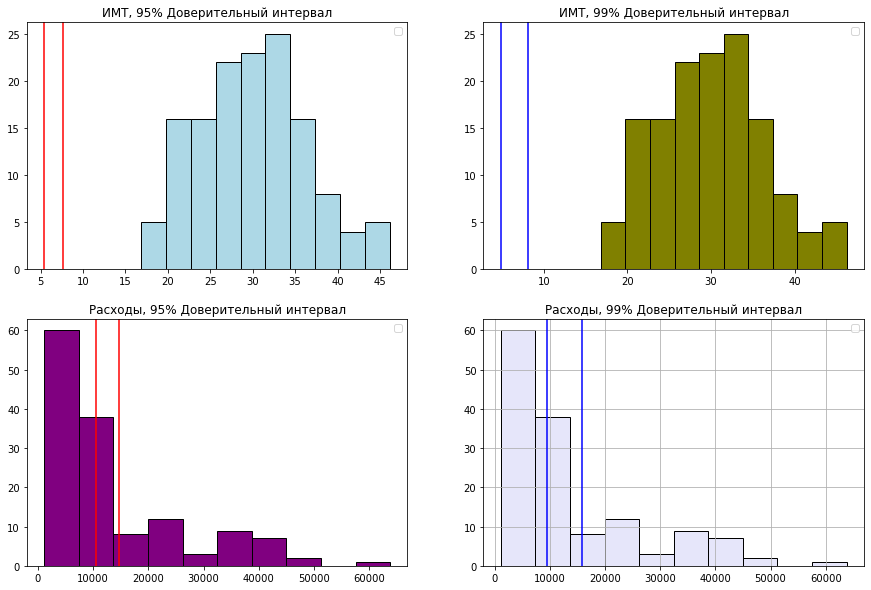

In [14]:
import numpy as np
t95=1.96 #95%
t99=3 #99%
vib = 140
ch_vib = df.charges.sample(n=vib)
bmi_vib = df.bmi.sample(n=vib)

mp_ch = np.std(ch_vib)/vib**0.5
mp_b=np.std(bmi_vib)/vib**0.5

delta_ch95 = t95*mp_ch
delta_ch99 = t99*mp_ch

delta_bmi95 = t95*mp_b
delta_bmi99 = t99*mp_b

fig, ax = plt.subplots(2,2, figsize = (15,10))
ax[0][0].hist(bmi_vib, edgecolor = 'black', facecolor = 'LightBlue')
ax[0][0].title.set_text("ИМТ, 95% Доверительный интервал")
ax[0][0].axvline(np.std(bmi_vib)+delta_bmi95, color='r')
ax[0][0].axvline(np.std(bmi_vib)-delta_bmi95, color='r')

ax[0][1].hist(bmi_vib, edgecolor = 'black', facecolor = 'olive')
ax[0][1].title.set_text("ИМТ, 99% Доверительный интервал")
ax[0][1].axvline(np.std(bmi_vib)+ delta_bmi99, color='b')
ax[0][1].axvline(np.std(bmi_vib)-delta_bmi99, color='b')

ax[1][0].hist(ch_vib, edgecolor = 'black', facecolor = 'purple')
ax[1][0].title.set_text("Расходы, 95% Доверительный интервал")
ax[1][0].axvline(np.std(ch_vib)+ delta_ch95, color='r')
ax[1][0].axvline(np.std(ch_vib)-delta_ch95, color='r')

ax[1][1].hist(ch_vib, edgecolor = 'black', facecolor = 'lavender', bins = 10)
ax[1][1].title.set_text("Расходы, 99% Доверительный интервал")
ax[1][1].axvline(np.std(ch_vib)+ delta_ch99, color='b')
ax[1][1].axvline(np.std(ch_vib)-delta_ch99, color='b')

plt.grid()
plt.show()

Проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений.

In [10]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Charges среднее генеральной совокупности
---------------
13270.422265141257

Charges стандартное отклонение генеральной совокупности 
---------------
12110.011236693994


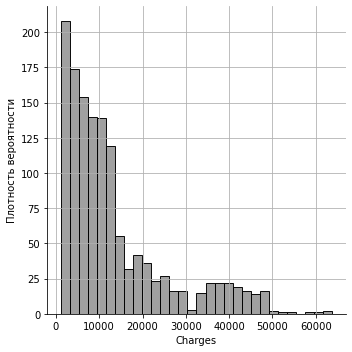

In [11]:
charges = df['charges']
print("Charges среднее генеральной совокупности")
print("---------------")
print(mean2)
print("\nCharges стандартное отклонение генеральной совокупности ")
print("---------------")
print(std2)
sns.displot(charges, color='grey', kde = False, edgecolor = 'black')
plt.grid()
plt.xlabel('Charges')
plt.ylabel('Плотность вероятности')
mean = []
def calc_sample_mean(sample_size, no_of_sample_means):
    for i in range(no_of_sample_means):        
        sample_charges = charges.sample(n=sample_size)
        sample_mean=sample_charges.mean()
        mean.append(sample_mean)
        
    return mean


Среднее данного распределения:  13518.360685328471
Стандартное отклонение:  3473.7170642708497


Text(10.049999999999997, 0.5, 'Плотность вероятности')

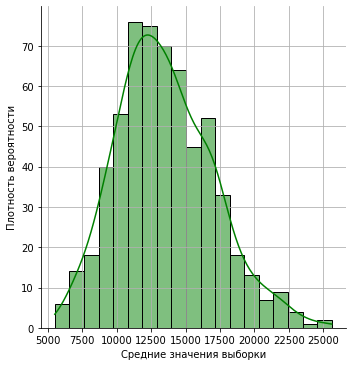

In [13]:
import statistics as st
mean_distribution=calc_sample_mean(sample_size=12, no_of_sample_means=300)
sns.displot(mean_distribution, color='g', edgecolor = 'black', kde = True)
print("Среднее данного распределения: ", np.mean(mean_distribution))
print("Стандартное отклонение: ", st.stdev(mean_distribution))
plt.grid()
plt.xlabel('Средние значения выборки')
plt.ylabel('Плотность вероятности')

Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. 
За ноль-гипотезу возьмем предположение, что данные находятся в нормальном распределении, за альтернативную –  не находятся.

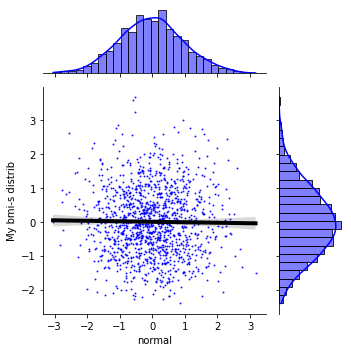

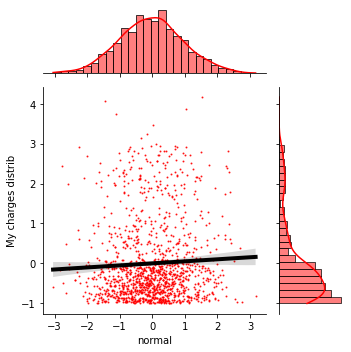

In [6]:
import numpy as np
import seaborn as sns
np.random.seed(0)
nor = np.random.normal(0,1, 1338)
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()#данные проходят z-преобразование
df['charges'] = (df['charges'] - df['charges'].mean()) / df['charges'].std()

qq= {'normal': pd.Series(nor), 'My bmi-s distrib': pd.Series(df.bmi), 'My charges distrib': pd.Series(df.charges)}
qqdf = pd.DataFrame(qq)
a = sns.jointplot(data = qqdf, y="My bmi-s distrib", x = "normal", kind='reg', color='b', height= 5, ratio = 3, 
scatter_kws={"s": 1,}, line_kws={"lw":4, 'color':'black'})
b= sns.jointplot(data = qqdf, y="My charges distrib", x = "normal", kind='reg', color='r', height= 5, ratio = 3, 
scatter_kws={"s": 1,}, line_kws={"lw":4, 'color':'black'})

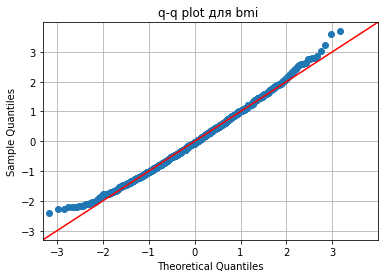

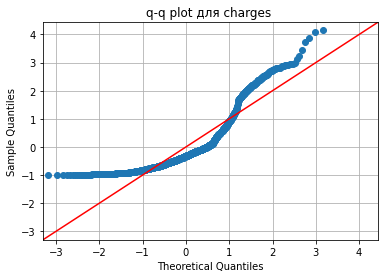

In [35]:
import statsmodels.api as sm
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
df['charges'] = (df['charges'] - df['charges'].mean()) / df['charges'].std()
sm.qqplot(df.bmi, line='45')
plt.title("q-q plot для bmi ")
plt.grid()
plt.show()
sm.qqplot(df.charges, line='45')
plt.title("q-q plot для charges ")
plt.grid()
plt.show()

In [100]:
import scipy.stats as sts
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
sk1 = sts.kstest(df.bmi, 'norm')
print(sk1)

KstestResult(statistic=0.026099881197044594, pvalue=0.3162798242838126)


In [99]:
import scipy.stats as sts
df['charges'] = (df['charges'] - df['charges'].mean()) / df['charges'].std()
sk1 = sts.kstest(df.bmi, 'norm')
print(sk1)

KstestResult(statistic=0.14967046269854684, pvalue=1.248811751567861e-26)


p-значение в первом случае больше 0.05, что означает,  большую вероятность ошибки при отклонении ноль-гипотезы, но отбрасывать её тоже нельзя. Во втором случае р-значение намного меньше 0.05, то есть ноль-гипотеза о нормальном распределении отбрасывается, так как вероятность ошибки крайне мала. Эти выводы подтверждает результат, отраженный на q-q plot графиках: только в случае с bmi, распределение похоже на нормальное.